# Stock Price Prediction using Geometric Brownian Motion

# Mentions and References :

https://github.com/bottama/stochastic-asset-pricing-in-continuous-time
<br></br>
https://www.kaggle.com/code/unmoved/example-quant-finance-gbm-heston/notebook 
<br></br>
http://www.idx.co.id/id/id-id/beranda/informasi/bagiinvestor/pengantarpasarmodal.aspx
<br></br>
Stochastic Processes in Finance given by Gilles Criton

# What is a Geometric Brownian Motion?

Geometric Brownian Motion (GBM) serves as a fundamental mathematical tool for modeling uncertainty in financial markets, aiding in pricing, risk management, and the analysis of various financial products, including the modeling of stock prices. However, it has limitations, including assumptions of constant volatility and the omission of factors such as market jumps or heavy-tailed return distributions. More sophisticated models are available to address these limitations, but GBM continues to be a widely used starting point for modeling stock price dynamics.
<br></br>
Geometric Brownian Motion is defined by the following stochastic differential equation (SDE)
<br></br>
$$
dS_t = \mu S_t \,dt + \sigma S_t \,dW_t
$$
\\
\begin{align*}
S_t & \text{ is the Stock price at time} \\
\mu & \text{ is the Drift term, representing the expected return} \\
\sigma & \text{ is the Volatility term, representing the standard deviation of returns} \\
dW_t & \text{ is the Increment of a Wiener process or Brownian motion}
\end{align*}


## Exploratory Data Analysis

In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.1 MB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135721 sha256=35c5bd378a00e4cf6572f7200540a10fa5a9a60dae0cb186f19721b3ec1388f9
  Stored in directory: /Users/duncanwatson/Library/Caches/pip/wheels/02/20/23/74a10d0cd31f5d41c19b92ddf4c138ceff01b9f4675f19dbf5
Successfully built peewee


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
#import QuantLib as ql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy.stats import lognorm, shapiro, anderson
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get data we need from Microsoft
nvda = yf.Ticker("NVDA")

# Show last years history
hist = nvda.history(period="12y")

# Convert the index date to proper datetime format
hist.index = pd.to_datetime(hist.index).strftime('%Y-%m-%d')

# Make the Dates a normal column
hist.reset_index(inplace=True)

# Ensure ot is a datetime column
hist['Date'] = pd.to_datetime(hist['Date'])

# Show the DataFrame
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2011-11-09,3.378421,3.421998,3.270623,3.284384,53224400,0.0,0.0
1,2011-11-10,3.364660,3.399063,3.236220,3.318788,99048400,0.0,0.0
2,2011-11-11,3.412824,3.463283,3.227045,3.435760,175156000,0.0,0.0
3,2011-11-14,3.435760,3.470163,3.360072,3.369246,50029200,0.0,0.0
4,2011-11-15,3.337137,3.438053,3.327962,3.412824,50566000,0.0,0.0
...,...,...,...,...,...,...,...,...
3014,2023-11-02,433.279999,438.839996,428.940002,435.059998,40917200,0.0,0.0
3015,2023-11-03,440.200012,453.089996,437.230011,450.049988,42385500,0.0,0.0
3016,2023-11-06,452.850006,459.350006,448.989990,457.510010,40073300,0.0,0.0
3017,2023-11-07,457.190002,462.179993,451.579987,459.549988,34316500,0.0,0.0


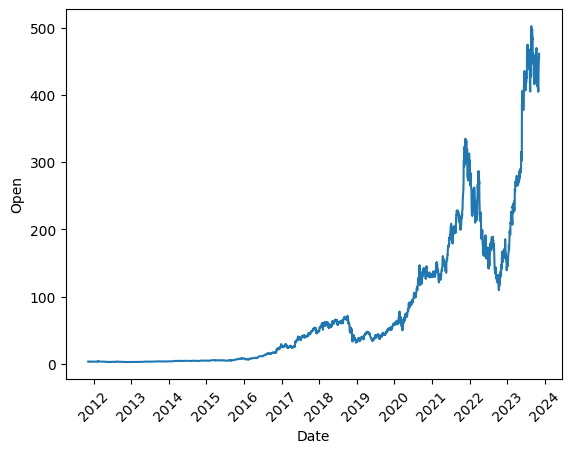

In [5]:
# Plot the Open price
sns.lineplot(x='Date', y='Open', data=hist)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

In [6]:
stock_name = 'NVDA'
start_date = '2011-11-07'
end_date = '2023-09-06'
pred_end_date = '2023-11-06'
scen_size = 1000

In [7]:
prices = hist['Close']
daily_returns = prices.pct_change().dropna()

Text(0, 0.5, 'Frequency')

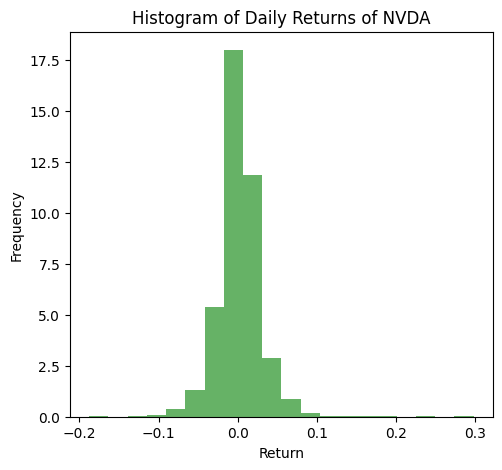

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(daily_returns, bins=20, density=True, alpha=0.6, color="g")
plt.title(f"Histogram of Daily Returns of NVDA")
plt.xlabel("Return")
plt.ylabel("Frequency")

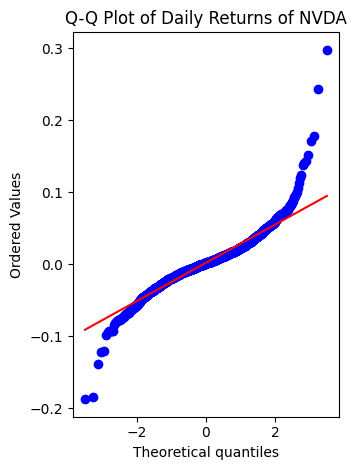

In [9]:
plt.subplot(1, 2, 2)
stats.probplot(daily_returns, dist="norm", plot=plt)
plt.title(f"Q-Q Plot of Daily Returns of NVDA")
plt.tight_layout()
plt.show()

In [10]:
# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(daily_returns)
if shapiro_test.pvalue > 0.05: # Using 5% significance level
    print(f"The daily returns of 'NVDA' do not significantly deviate from a normal distribution (Shapiro-Wilk p-value: {shapiro_test.pvalue}).")
else:
    print(f"The daily returns of 'NVDA' do not follow a normal distribution (Shapiro-Wilk p-value: {shapiro_test.pvalue}).")

The daily returns of 'NVDA' do not follow a normal distribution (Shapiro-Wilk p-value: 1.9833965011588203e-37).


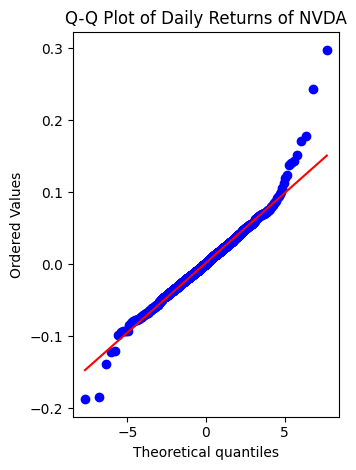

In [11]:
plt.subplot(1, 2, 2)
stats.probplot(daily_returns, dist="laplace", plot=plt)
plt.title(f"Q-Q Plot of Daily Returns of NVDA")
plt.tight_layout()
plt.show()

# Building our Geometric Brownian Motion

In [12]:
# Calculate daily returns and annualized volatility
# 252 trading days in a year
daily_returns = prices.pct_change().dropna()
annual_volatility = daily_returns.std() * (252**0.5)
mu = daily_returns.mean() * 252
sigma = annual_volatility
S0 = prices.iloc[-1]
T = 1
dt = 1/252
timesteps = int(T/dt)

In [147]:
# Simulate GBM paths
np.random.seed(23) # for reproducibility
n_simulations = 1000
paths = np.zeros((timesteps + 1, n_simulations))
paths[0] = S0
for t in range(1, timesteps + 1):
    z = np.random.standard_normal(n_simulations)
    paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma  * z)

In [14]:
# Calculate and normalize probabilities
# Function to calculate the probability of the end points
def calculate_probabilities(paths, S0, mu, sigma, T):
    end_points = paths[-1]
    scale = S0 * np.exp(mu * T)
    probabilities = lognorm.pdf(end_points, s=sigma * np.sqrt(T), scale=scale)
    return probabilities
probabilities = calculate_probabilities(paths, S0, mu, sigma, T)
normalized_probabilities = probabilities / probabilities.max()
sorted_indices = np.argsort(normalized_probabilities)
sorted_paths = paths[:, sorted_indices]
sorted_probabilities = normalized_probabilities[sorted_indices]

Text(0, 0.5, 'Price')

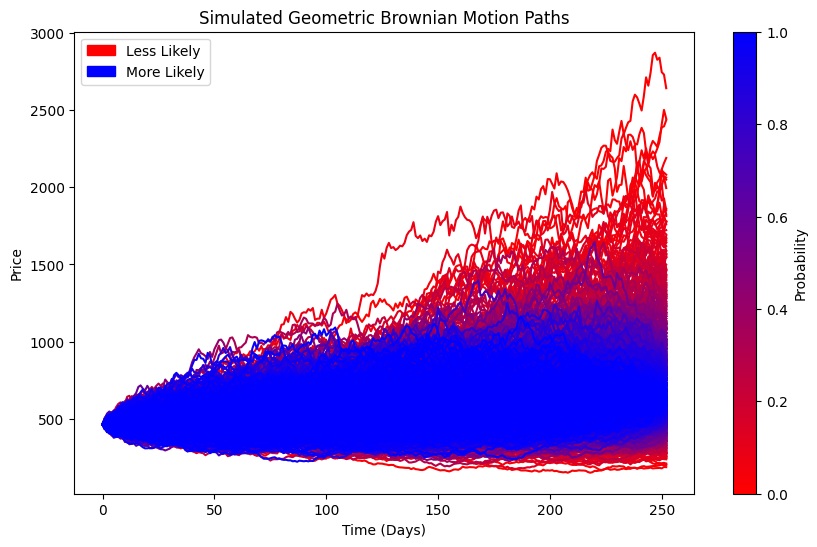

In [15]:
# Plotting the paths with color based on probability
colormap = LinearSegmentedColormap.from_list("RedToBlue", ["red", "blue"])
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_simulations):
    ax.plot(sorted_paths[:, i], lw=1.5, color=colormap(sorted_probabilities[i]))

# Legend and color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation="vertical", ax=ax)
cbar.set_label('Probability')
red_patch = mpatches.Patch(color='red', label='Less Likely')
blue_patch = mpatches.Patch(color='blue', label='More Likely')
ax.legend(handles=[red_patch, blue_patch])

ax.set_title('Simulated Geometric Brownian Motion Paths')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Price')

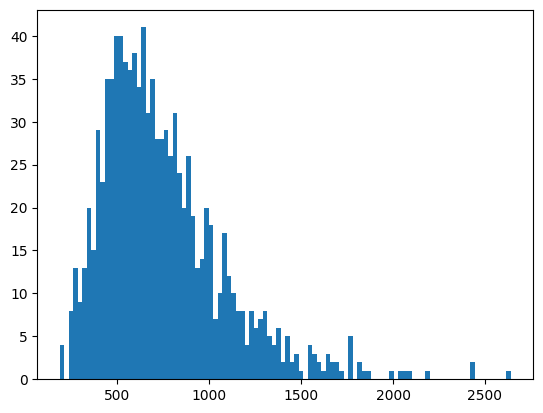

In [16]:
plt.figure()
plt.hist(paths[-1], bins = 100)
plt.show()

In [17]:
delta_stock_price = (paths[-1] - S0).mean() / S0
delta_perc = "{:.2%}".format(delta_stock_price)
print("Stock Price forecast : ", delta_perc)

Stock Price forecast :  60.75%


# Testing model on a test set 

In [145]:
import math
test_set = prices[2700:2700+252]
prices2 = prices[0:2700]

In [19]:
import scipy

In [21]:

from fitter import Fitter

SKIPPED gaussian distribution (taking more than 120 seconds)
gaussian was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,25.231811,693.599963,705.624662,inf,0.019471,2.000352e-01
gamma,265.555836,1877.399700,1895.436749,inf,0.091700,1.555210e-22
gaussian,inf,inf,inf,inf,NaN,NaN


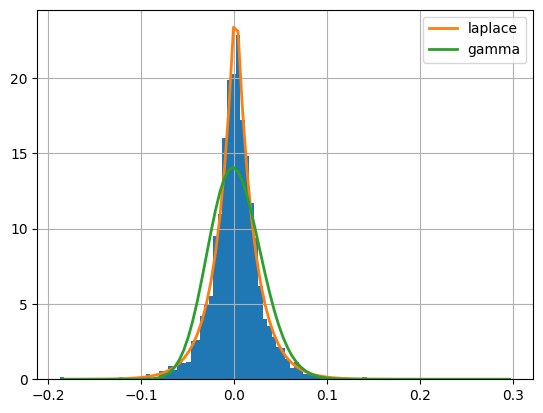

In [22]:
f = Fitter(daily_returns, timeout = 120, distributions=['gamma', 'laplace', 'gaussian'])
f.fit()
f.summary()

In [23]:
f.get_best(method = "bic")

{'laplace': {'loc': 0.0017269939885380392, 'scale': 0.018940757744208562}}

Text(0, 0.5, 'Price')

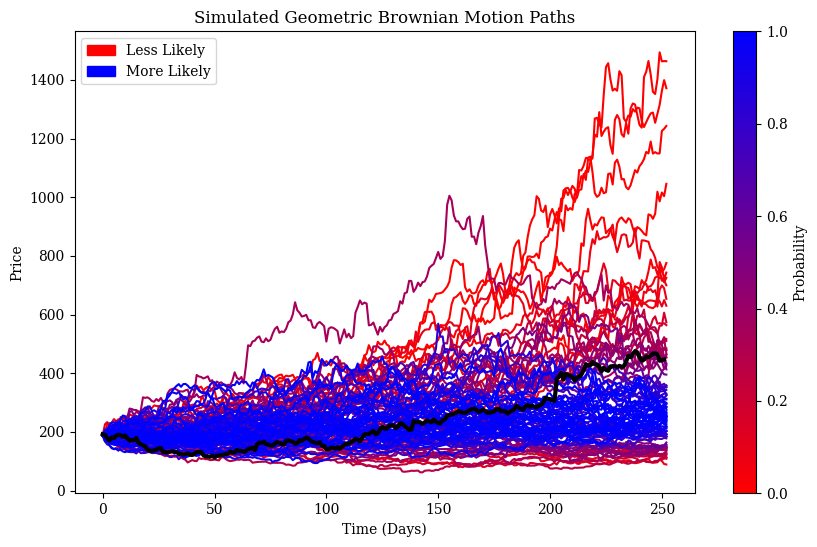

In [149]:
daily_returns = prices2.pct_change().dropna()
annual_volatility = daily_returns.std() * (252**0.5)
mu = daily_returns.mean() * 252
sigma = annual_volatility
S0 = prices2.iloc[-1]
T = 1
dt = 1/252
timesteps = int(T/dt)

np.random.seed(22) # for reproducibility
n_simulations = 100
paths = np.zeros((timesteps + 1, n_simulations))
paths[0] = S0
for t in range(1, timesteps + 1):
    # z = np.random.standard_normal(n_simulations)
    # a = hosking(1,100, 0.75)
    z = scipy.stats.laplace.rvs(size=n_simulations)
    paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    
probabilities = calculate_probabilities(paths, S0, mu, sigma, T)
normalized_probabilities = probabilities / probabilities.max()
sorted_indices = np.argsort(normalized_probabilities)
sorted_paths = paths[:, sorted_indices]
sorted_probabilities = normalized_probabilities[sorted_indices]


colormap = LinearSegmentedColormap.from_list("RedToBlue", ["red", "blue"])
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_simulations):
    ax.plot(sorted_paths[:, i], lw=1.5, color=colormap(sorted_probabilities[i]))

t = test_set.reset_index(drop = True)
ax.plot(t, label = 'Actual', color = "black", linewidth = 3)
# Legend and color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation="vertical", ax=ax)
cbar.set_label('Probability')
red_patch = mpatches.Patch(color='red', label='Less Likely')
blue_patch = mpatches.Patch(color='blue', label='More Likely')
ax.legend(handles=[red_patch, blue_patch])

ax.set_title('Simulated Geometric Brownian Motion Paths')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Price')

In [131]:
S_max          = [paths[i,:].max() for i in range(0, int(252))]
S_min          = [paths[i,:].min() for i in range(0, int(252))]
S_pred         = .2 * np.array(S_max) + .8 * np.array(S_min)

In [132]:
df1 = pd.DataFrame(S_pred)
df2 = pd.DataFrame(test_set)
df2 = df2.reset_index(drop = True)
merged_df = pd.merge(df2, df1, left_index=True, right_index=True)

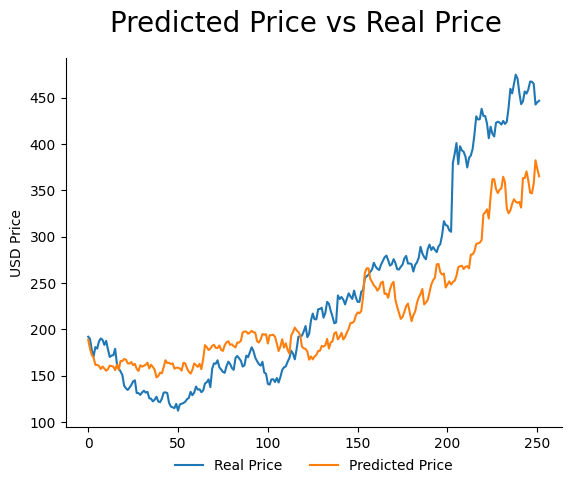

In [133]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Predicted Price vs Real Price', fontsize=20)
plt.ylabel('USD Price')
plt.plot(merged_df)
plt.legend(['Real Price', 'Predicted Price'],
           loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)
plt.show()

In [134]:
mse = 1/len(merged_df) * np.sum((merged_df[0] - merged_df['Close']) ** 2)
np.sqrt(mse)

55.99793349503471

In [135]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(merged_df[0], merged_df['Close'])

0.19282382881049975

Here we take the mean to predict the stock price

In [322]:
newpreds = pd.DataFrame(paths).mean(axis = 1)
newpreds = newpreds[:-1]

In [323]:
newpreds = pd.DataFrame(newpreds)

In [324]:
merged2 = pd.merge(df2, newpreds, left_index=True, right_index=True)

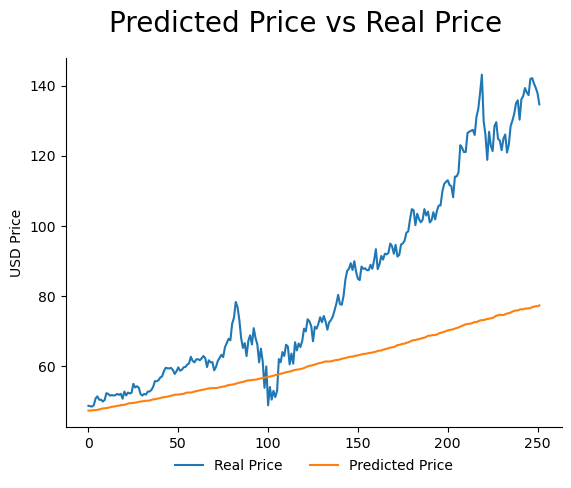

In [325]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Predicted Price vs Real Price', fontsize=20)
plt.ylabel('USD Price')
plt.plot(merged2)
plt.legend(['Real Price', 'Predicted Price'],
           loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)
plt.show()

We see in our training and test set the model does not fit well at all - looking more closely this is due to in 2022: The stock price of Nvidia, one of the largest chipmakers in the US, fell to a 52-week low after the US imposed new restrictions on the export of the company’s artificial intelligence (AI) chips to China and Russia.

# Simulation using Fractal Brownian Motion

In [36]:
def hosking(T, N, H):
    '''
    Generates sample paths of fractional Brownian Motion using the Davies Harte method
    
    args:
        T:      length of time (in years)
        N:      number of time steps within timeframe
        H:      Hurst parameter
    '''
    gamma = lambda k,H: 0.5*(np.abs(k-1)**(2*H) - 2*np.abs(k)**(2*H) + np.abs(k+1)**(2*H))  
    
    X = [np.random.standard_normal()]
    mu = [gamma(1,H)*X[0]]
    sigsq = [1 - (gamma(1,H)**2)]
    tau = [gamma(1,H)**2]
    
    d = np.array([gamma(1,H)])
    
    for n in range(1, N):
        
        F = np.rot90(np.identity(n+1))
        c = np.array([gamma(k+1,H) for k in range(0,n+1)])
                
        # sigma(n+1)**2
        s = sigsq[n-1] - ((gamma(n+1,H) - tau[n-1])**2)/sigsq[n-1]
        
        # d(n+1)
        phi = (gamma(n+1,H) - tau[n-1])/sigsq[n-1]
        d = d - phi*d[::-1]
        d = np.append(d, phi)        
        
        # mu(n+1) and tau(n+1)
        Xn1 = mu[n-1] + sigsq[n-1]*np.random.standard_normal()
        
        X.append(Xn1)
        sigsq.append(s)
        mu.append(d @ X[::-1])
        tau.append(c @ F @ d)
    
    fBm = np.cumsum(X)*(N**(-H))    
    return (T**H)*fBm


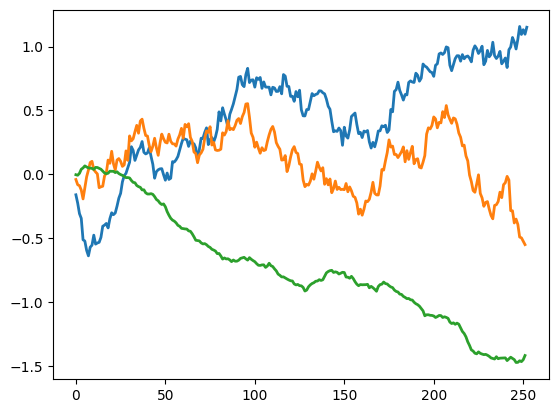

In [124]:
a = hosking(1,253, 0.5);#plt.plot(np.cumsum((a))*np.sqrt(1/200),lw=2)
b = hosking(1,252, 0.5)
c = hosking(1,252, 0.75)
plt.plot(a,lw=2)
plt.plot(b,lw=2)
plt.plot(c,lw=2)

# Simulation using Heston Stochastic Volatility

In [150]:
np.arange(1, int(252) + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18